## Pytorch Basic Tutorial




### Pytorch & Numpy

- Popular Deep Learning Library
- Numpy의 기능 대부분을 Pytorch에서 사용가능
- Neural Network 학습에 필요한 전반적인 기능을 제공


|                    | Pytorch | Numpy       |
|--------------------|---------|-------------|
| Type Name          | Tensor  | Numpy Array |
| Training Framework | O       | X           |
| GPU Available      | O       | X           |

![image.png](attachment:image.png)

In [ ]:
import torch # not pytorch
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # don't care about this

In [ ]:
ls = [1., 2., 3.]
#torch.Size([]): 0차원 (스칼라)
#torch.Size([5]): 1차원 (길이가 5인 벡터)
#torch.Size([3, 4]): 2차원 (3x4 행렬)
#orch.Size([2, 3, 5]): 3차원 (채널, 높이, 너비 = (0, 1, 2))
x_torch = torch.tensor(ls)
x_np = np.array(ls)
print("Pytorch");print(x_torch);print(type(x_torch))
print("Numpy");print(x_np);print(type(x_np))

Pytorch
tensor([1., 2., 3.])
<class 'torch.Tensor'>
Numpy
[1. 2. 3.]
<class 'numpy.ndarray'>


In [ ]:
# zero values
x_torch = torch.zeros(2,3)
x_np = np.zeros((2,3))
print("Pytorch");print(x_torch)
print("Numpy");print(x_np)

Pytorch
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Numpy
[[0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
# sample from normal distribution
x_torch = torch.randn(2,3)
x_np = np.random.randn(2,3)
print("Pytorch");print(x_torch)
print("Numpy");print(x_np)

Pytorch
tensor([[ 0.6119, -2.4998,  0.5270],
        [-1.2278, -0.0595, -1.4724]])
Numpy
[[ 0.59940242 -1.11248454  2.37305714]
 [-0.88277044 -2.5746783  -0.76520425]]


### Pytorch: Dataset Loading
- ImageFolder
- DataLoader
- Torchvision.Transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


dataset size: 91
label: tensor([3, 5, 2, 2])
data shape: torch.Size([4, 3, 28, 28])


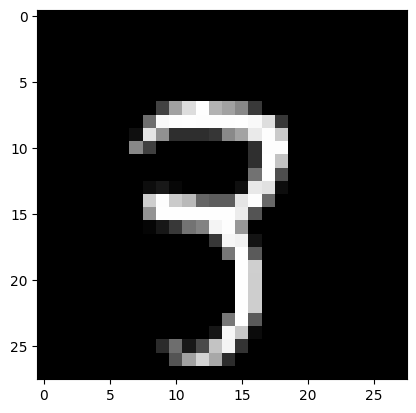

In [ ]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load from directory
# transforms.Compose(): 여러 개의 변환을 순차적으로 적용할 수 있도록 묶어주는 함수. 리스트 형태로 변환들을 전달.
# transforms.ToTensor(): 이미지 데이터를 PyTorch 텐서로 변환.
transformation = transforms.Compose([
    transforms.ToTensor()
])

#dataset = ImageFolder('dataset/')
#주어진 데이터셋에서 데이터를 배치 단위로 불러오고 섞는 과정
dataset = ImageFolder('/content/drive/MyDrive/포스코 청년 AI BigData 아카데미 Computer Vision/2.DNN+Classification/pytorch_basic/dataset/', transformation)
print(f"dataset size: {len(dataset)}")

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for i in dataloader:
    # i[0]: image data, i[1]: label
    print(f"label: {i[1]}")
    print(f"data shape: {i[0].shape}")
    # PyTorch의 텐서는 (채널, 높이, 너비) 순서로 저장되는데, matplotlib의 imshow 함수는 (높이, 너비, 채널) 순서를 기대합니다. 따라서 .permute(1,2,0)을 사용하여 차원 순서를 변경
    # interpolation='nearest': 이미지를 확대 또는 축소할 때 가장 가까운 픽셀 값을 사용하여 보간함.
    plt.imshow(i[0][0].permute(1,2,0), cmap='Greys', interpolation='nearest')
    plt.show()
    break;

### Pytorch: Dataset Loading
- torchvision library

dataset size: 60000
label: tensor([2, 5, 4, 3])
data shape: torch.Size([4, 1, 28, 28])


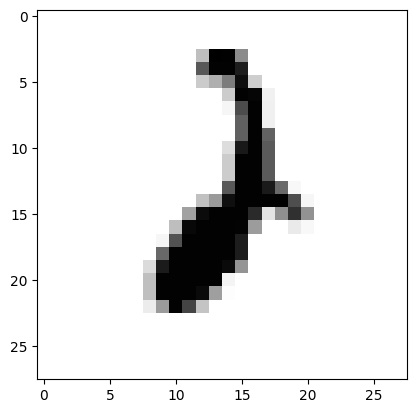

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load from directory
transformation = transforms.Compose([
    transforms.ToTensor()
])

download_root = './MNIST_DATASET'

train_dataset = MNIST(download_root, transform=transformation, train=True, download=True)
print(f"dataset size: {len(train_dataset)}")

batch_size = 4

dataloader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size,
                         shuffle=True)

for i in dataloader:
    # i[0]: image data, i[1]: label
    print(f"label: {i[1]}")
    print(f"data shape: {i[0].shape}")
    plt.imshow(i[0][0][0], cmap='Greys', interpolation='nearest')
    plt.show()
    break;

### Pytorch: Define Model
- nn.module
- init
- forward


In [ ]:
import torch
# import torch.nn as nn: 이 모듈은 신경망 계층 (예: 선형 계층, 컨볼루션 계층 등)과 손실 함수 등을 정의하는 데 사용됨.
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        # super(Net, self).__init__(): 부모 클래스 (nn.Module)의 생성자를 호출하여 필요한 초기화를 수행.
        super(Net, self).__init__()

    # pytorch에서 forward 메서드는 호출하는 것이 아니라 자동으로 호출되며, 입력데이터를 모델에 전달하는 기능을 함.
    def forward(self, x):
        print('hello world', x)

model = Net()
model(-1)
model(2)

hello world -1
hello world 2


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # fc1 = 120개의 입력 특징을 받아 84개의 출력 특징으로 변환하는 선형 계층
        self.fc1 = nn.Linear(120, 84)

    def forward(self, x):
        print('hello world', x)

model = Net()
# model에 input data가 없기 때문에, hello world가 출력되지 않음
print(model)

Net(
  (fc1): Linear(in_features=120, out_features=84, bias=True)
)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(120, 84)

    def forward(self, x):
        print('hello world', x)

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # fc(계층) 전후에는 출력특징과 입력특징 수를 맞춰야 함.
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)

    # 순전파 과정 : 입력데이터인 x를 fc1 - relu함수 - fc2를 거치면서 변환.
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x

model = Net()
print(model)
x = torch.randn(16, 2)
y = model(x)
print(y.shape)
# print(y)

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)
torch.Size([16, 2])


### Pytorch: backward()
- Optimizer
    - step()
    - zero_grad()

In [ ]:
torch.random.manual_seed(1)

# W, b는 각각 가중치와 bias이므로, 기울기 계산에 필요
# requires_grad_() : 해당 텐서를 사용하여 연산을 수행할 때, 그 연산에 대한 기울기를 계산하고 저장해야 함을 PyTorch에게 알림
w = torch.randn(2, 3).requires_grad_()
x = torch.randn(3)
b = torch.randn(2).requires_grad_()
y = torch.randn(2)

# 해당 loss는 mse
loss = (w.matmul(x).add(b).sub(y) ** 2).mean()

print("## Before backward ##")
print(w.grad)

# 역전파 계산
loss.backward()

print("## After backward ##")
print(w.grad)


## Before backward ##
None
## After backward ##
tensor([[ 2.2436, -0.5624,  1.5141],
        [ 2.5045, -0.6277,  1.6901]])


### Pytorch: Optimizer
- step()
- zero_grad()
- Practice

In [ ]:
import torch.optim as optim

torch.random.manual_seed(1)

w = torch.randn(2, 3).requires_grad_()
x = torch.randn(3)
b = torch.randn(2).requires_grad_()
y = torch.randn(2)

optimizer = optim.SGD([w, b], lr=0.1)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()
loss.backward()

print("## Initial w ##")
print(w)
print("## Initial grad ##")
print(w.grad)

print("## After Step ##")
optimizer.step()
print(w)

print("## After zero_grad ##")
optimizer.zero_grad()
print(w.grad)

## Initial w ##
tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661]], requires_grad=True)
## Initial grad ##
tensor([[ 2.2436, -0.5624,  1.5141],
        [ 2.5045, -0.6277,  1.6901]])
## After Step ##
tensor([[ 0.4370,  0.3232, -0.0897],
        [ 0.3709, -0.3891, -0.3351]], requires_grad=True)
## After zero_grad ##
None


### appendix
### Pytorch: GPU
- cuda()
- 연산에 사용되는 Tensor들을 cuda() 함수를 사용해서 GPU연산을 사용하도록 설정한다.
- nn.Module을 상속받은 모델도 cuda() 함수를 사용해서 GPU 연산을 사용하도록 설정 가능하다.

In [ ]:
import torch
import torch.optim as optim

# GPU 사용 가능 여부 확인 및 설정
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU 사용 가능: ", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU 사용 불가능, CPU 사용")

# 텐서를 GPU로 이동
w = torch.randn(2, 3, requires_grad=True, device=device)
x = torch.randn(3).to(device)
b = torch.randn(2, requires_grad=True, device=device)
y = torch.randn(2).to(device)

optimizer = optim.SGD([w, b], lr=0.1)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()
loss.backward()

optimizer.step()
optimizer.zero_grad()

print(loss.device)

GPU 사용 가능:  Tesla T4
cuda:0


In [ ]:
import torch
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x

model = Net().cuda()

print(model.fc1.weight.device)

cuda:0
